<a href="https://colab.research.google.com/github/yakshteja2004/Oasis-Infobyte-/blob/main/EDA_on_retail_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# step1 :Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
plt.style.use("seaborn-v0_8")

In [2]:
# step 2: Upload your dataset
from google.colab import files
uploaded = files.upload()

import io

# Automatically get uploaded file name
file_name = list(uploaded.keys())[0]
print("Reading file:", file_name)

df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.head()

Saving retail_sales_dataset (1).csv to retail_sales_dataset (1).csv
Reading file: retail_sales_dataset (1).csv


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Step 3: Basic dataset overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Shape: (1000, 9)

Columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Step 4: Missing values and data types
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())


Missing values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Data types:
 Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

Summary statistics:
        Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.5

In [5]:
# Step 5: Convert Date to datetime and create Month/Year columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023


In [6]:
# Step 6: Basic KPIs
total_sales = df['Total Amount'].sum()
avg_sales = df['Total Amount'].mean()
total_quantity = df['Quantity'].sum()

print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Average Sale per Transaction: ₹{avg_sales:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")

Total Sales: ₹456,000.00
Average Sale per Transaction: ₹456.00
Total Quantity Sold: 2514


/tmp/ipython-input-561889526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='mako')
/tmp/ipython-input-561889526.py:8: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


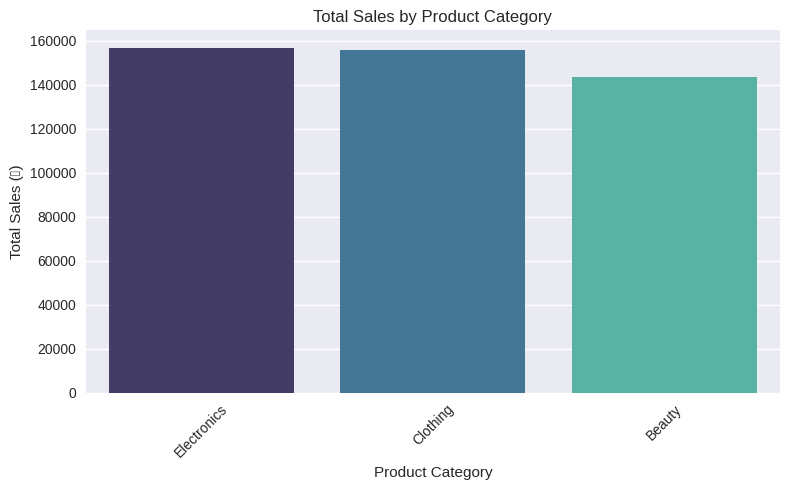

In [7]:
# Step 7: Total Sales by Product Category
plt.figure(figsize=(8,5))
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette='mako')
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1454051400.py:8: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


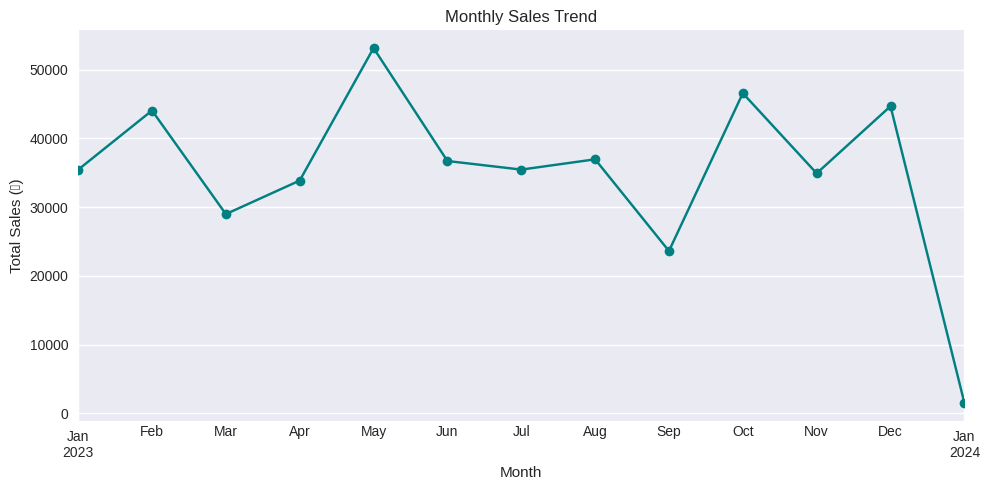

In [8]:
# Step 8: Monthly Sales Trend
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))['Total Amount'].sum()
monthly_sales.plot(kind='line', figsize=(10,5), marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-392105932.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='pastel')
/tmp/ipython-input-392105932.py:7: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


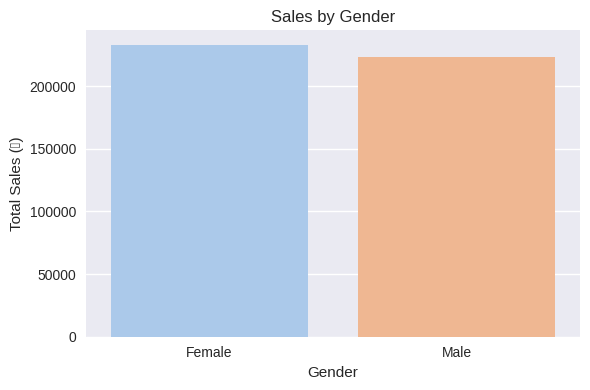

In [9]:
# Step 9: Gender-wise Sales
gender_sales = df.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(6,4))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='pastel')
plt.title("Sales by Gender")
plt.ylabel("Total Sales (₹)")
plt.tight_layout()
plt.show()


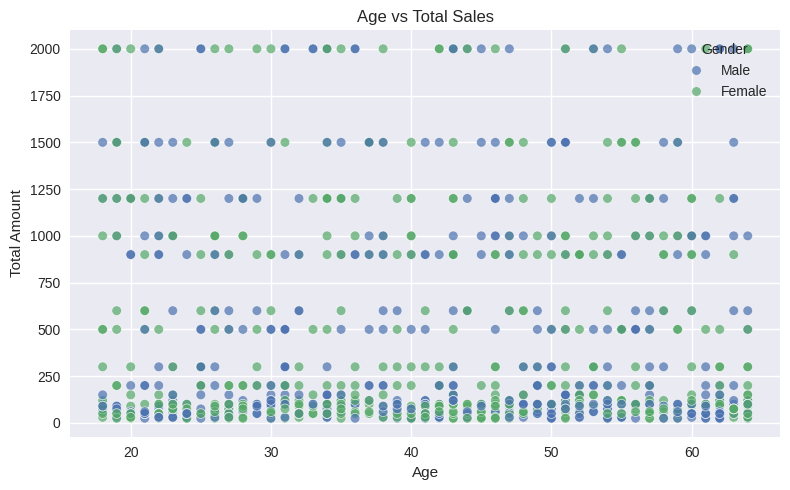

In [10]:
# Step 10: Age vs Total Sales
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Gender', alpha=0.7)
plt.title("Age vs Total Sales")
plt.tight_layout()
plt.show()


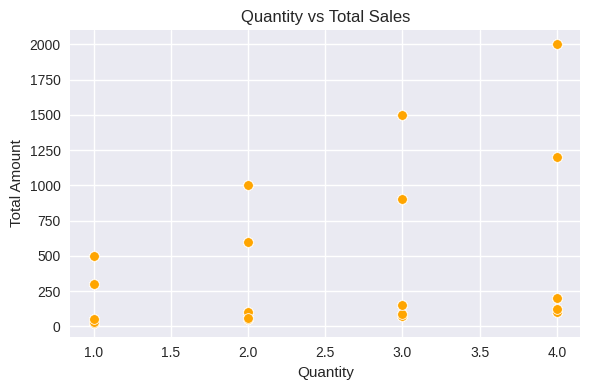

In [11]:
# Step 11: Quantity vs Sales
plt.figure(figsize=(6,4))
sns.scatterplot(x='Quantity', y='Total Amount', data=df, color='orange')
plt.title("Quantity vs Total Sales")
plt.tight_layout()
plt.show()


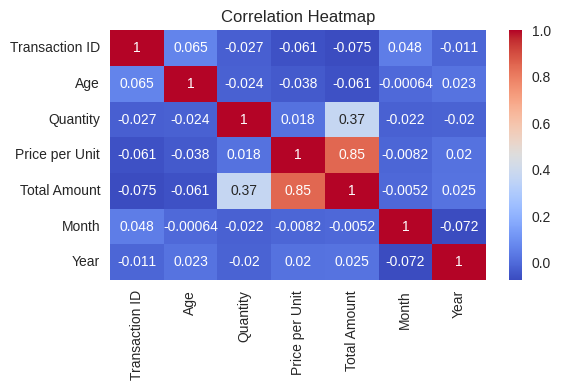

In [12]:
# Step 12: Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [13]:
# Step 13: Summary Insights
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))['Total Amount'].sum()

print("\n--- Key Insights ---")
print(f"- Total sales: ₹{total_sales:,.2f}")
print(f"- Average sale per transaction: ₹{avg_sales:,.2f}")
print(f"- Best performing category: {category_sales.idxmax()}")
print(f"- Highest sales month: {monthly_sales.idxmax()}")
print("\n✅ EDA completed successfully!")


--- Key Insights ---
- Total sales: ₹456,000.00
- Average sale per transaction: ₹456.00
- Best performing category: Electronics
- Highest sales month: 2023-05

✅ EDA completed successfully!
